# PJM Estimated Hourly Load
http://www.pjm.com/markets-and-operations/energy/real-time/loadhryr.aspx

In [26]:
import datetime as dt
print('Notebook last updated: {}'.format(dt.datetime.now().strftime('%d-%B-%Y')))

Notebook last updated: 07-August-2018


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from IPython.display import Image
from IPython.core.display import HTML 
plt.style.use('ggplot')

%matplotlib inline

In [2]:
print('Python Version:', sys.version)
print('Pandas Version:', pd.__version__)
print('Numpy Version:', np.__version__)
print('Matplotlib Version:', matplotlib.__version__)
print('Seaborn Version:',sns.__version__)

Python Version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 18:21:58) 
[GCC 7.2.0]
Pandas Version: 0.22.0
Numpy Version: 1.14.2
Matplotlib Version: 2.2.2
Seaborn Version: 0.8.1


# Outline and Motiviation

# Background

PJM Interconnection is a wholesale electricity market that regulates a large portion of the US power grid. They publically share power consumption data on their website. We are going to pull this data for all of the regions shown in the map below. Because each utility joined PJM at different time, the historic data for each utility does not start at the same time.

In [3]:
#Show PJM Regions
Image(url= "http://slideplayer.com/4238181/14/images/4/PJM+Evolution.jpg")

# Loading Data

In [4]:
est_hourly_1998 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/1998.txt', 
                              error_bad_lines=False, index_col=[0, 1])
est_hourly_1999 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/1999.txt',
                              error_bad_lines=False, index_col=[0, 1])
est_hourly_2000 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2000.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2001 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2001.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2002 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2002.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2003 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2003.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2004 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2004.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2005 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2005.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2006 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2006.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2007 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2007.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2008 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2008.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2009 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2009.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2010 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2010.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2011 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2011.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2012 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2012.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2013 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2013.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2014 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2014.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2015 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2015.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2016 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2016.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2017 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2017.txt', error_bad_lines=False, index_col=[0, 1])
est_hourly_2018 = pd.read_csv('http://www.pjm.com/pub/account/loadhryr/2018.txt', error_bad_lines=False, index_col=[0, 1])

b'Skipping line 1611: expected 3 fields, saw 4\nSkipping line 1612: expected 3 fields, saw 4\n'
b'Skipping line 1467: expected 3 fields, saw 4\nSkipping line 1468: expected 3 fields, saw 4\n'
b'Skipping line 1515: expected 3 fields, saw 4\nSkipping line 1516: expected 3 fields, saw 4\n'
b'Skipping line 1539: expected 3 fields, saw 4\nSkipping line 1540: expected 3 fields, saw 4\n'
b'Skipping line 1563: expected 4 fields, saw 5\nSkipping line 1564: expected 4 fields, saw 5\n'
b'Skipping line 1587: expected 4 fields, saw 5\nSkipping line 1588: expected 4 fields, saw 5\n'
b'Skipping line 1467: expected 7 fields, saw 8\nSkipping line 1468: expected 7 fields, saw 8\n'
b'Skipping line 1491: expected 9 fields, saw 10\nSkipping line 1492: expected 9 fields, saw 10\n'
b'Skipping line 1515: expected 9 fields, saw 10\nSkipping line 1516: expected 9 fields, saw 10\n'
b'Skipping line 1371: expected 9 fields, saw 10\nSkipping line 1372: expected 9 fields, saw 10\n'
b'Skipping line 1419: expected 9 f

## Joining Up Dataframes

In [5]:
# Create a list of all dataframes
df_list = [est_hourly_1998, est_hourly_1999, est_hourly_2000, est_hourly_2001, 
           est_hourly_2002, est_hourly_2003, est_hourly_2004, est_hourly_2005,
           est_hourly_2006, est_hourly_2007, est_hourly_2008, est_hourly_2009,
           est_hourly_2010, est_hourly_2011, est_hourly_2012, est_hourly_2013,
           est_hourly_2014, est_hourly_2015, est_hourly_2016, est_hourly_2017, 
           est_hourly_2018]

# Rename the DAY and HOUR columns to be the same in each dataframe
column_rename = {'PJM-E': 'PJME',
                 'PJM-W': 'PJMW',
                 'DAY' : 'DAYTON'
                }
# Loop through and rename
for df in df_list:
    df.rename(columns=column_rename, inplace=True)

# Concatenate the results
est_hourly = pd.concat(df_list)
# Reset the index
est_hourly = est_hourly.reset_index()

# Convert hour column
est_hourly['Hour'] = est_hourly['Hour'].apply(lambda x: int('{0:02.0f}'.format(*divmod(x * 60 / 100, 60))))
est_hourly['Date'] = pd.to_datetime(est_hourly['Date'])
# Date plus timedelta
est_hourly['Datetime'] = est_hourly.apply(lambda x: x['Date'] + np.timedelta64(x['Hour'], 'h'), axis =1 )
est_hourly = est_hourly.set_index('Datetime').drop(['Date','Hour'], axis=1)

## Data Cleanup

In [6]:
# Replace the unreasonibly high values found for AEP as NaN
est_hourly.loc[est_hourly['AEP'] >= 40000.0, 'AEP'] = np.NaN

# Store The Data in Parquet Format

Requires pyarrow insalled using
`conda install pyarrow`

In [8]:
est_hourly.to_parquet('../data/est_hourly.paruqet')

# Plot the Results

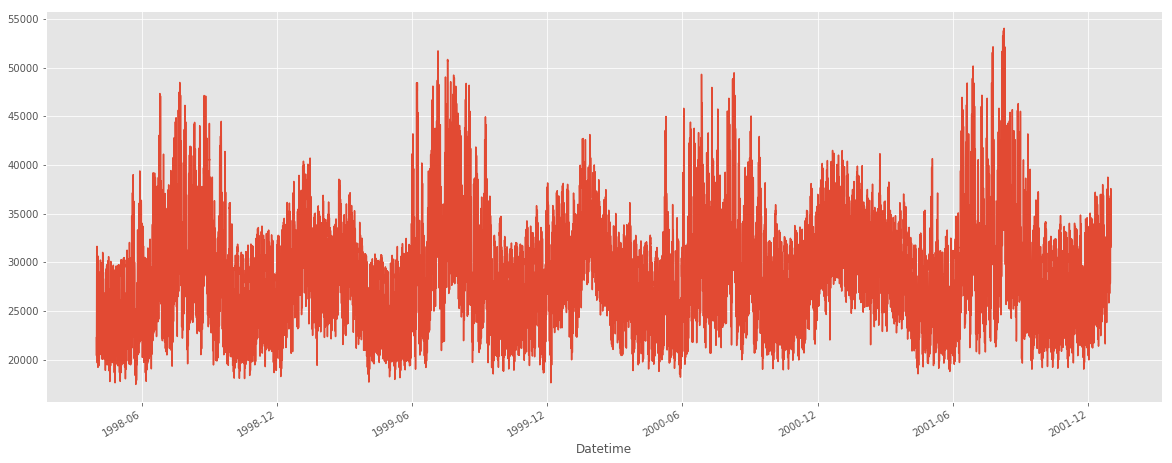

In [9]:
est_hourly['PJM_Load'].plot(figsize=(20,8))

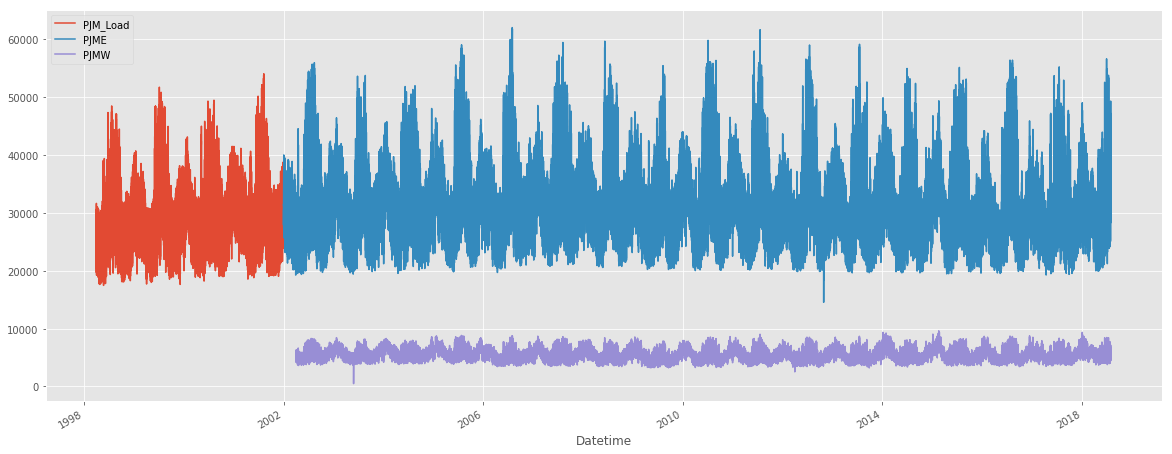

In [10]:
est_hourly[['PJM_Load','PJME','PJMW']].plot(figsize=(20,8))

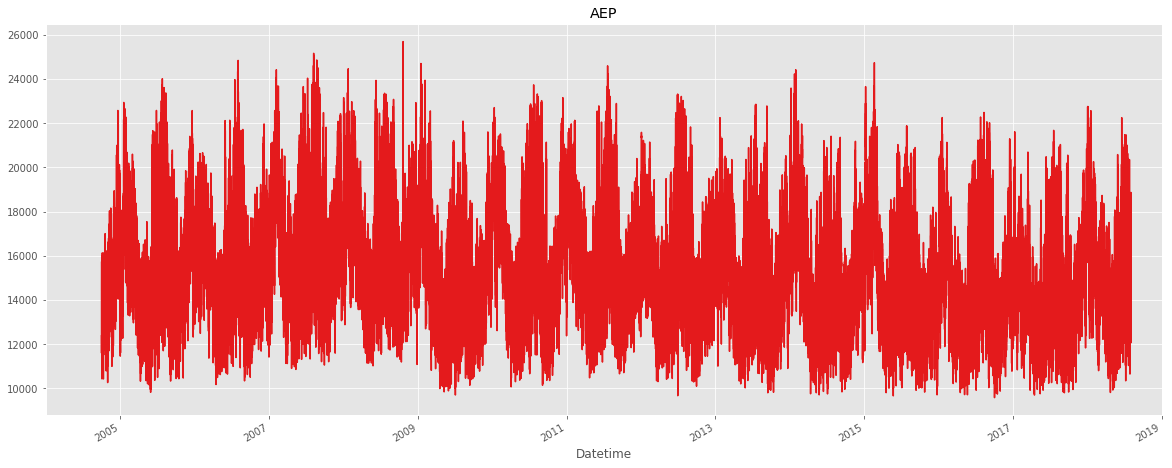

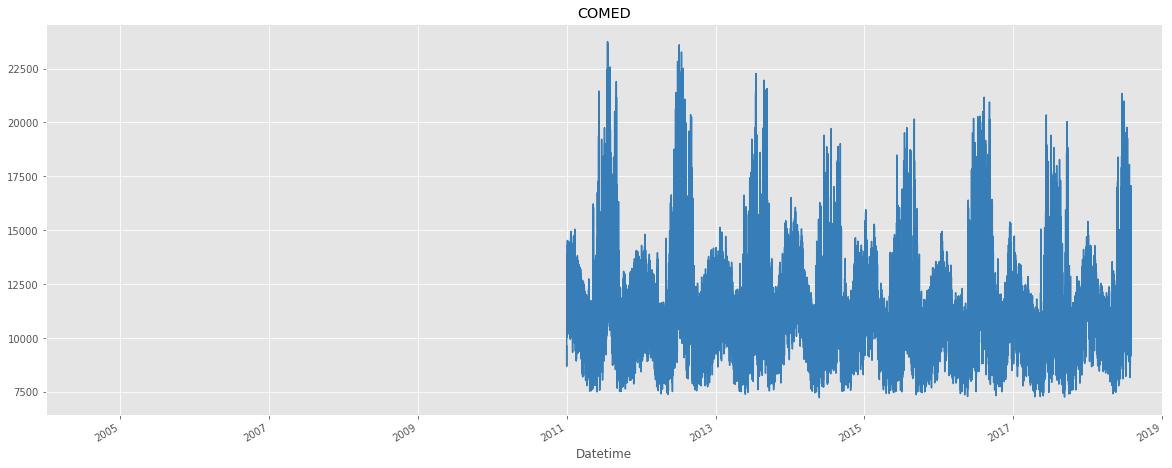

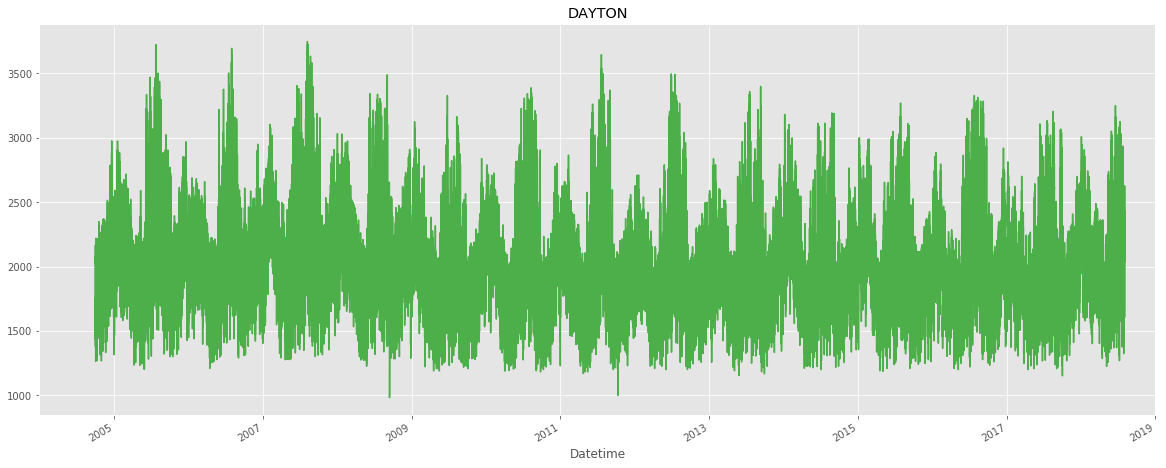

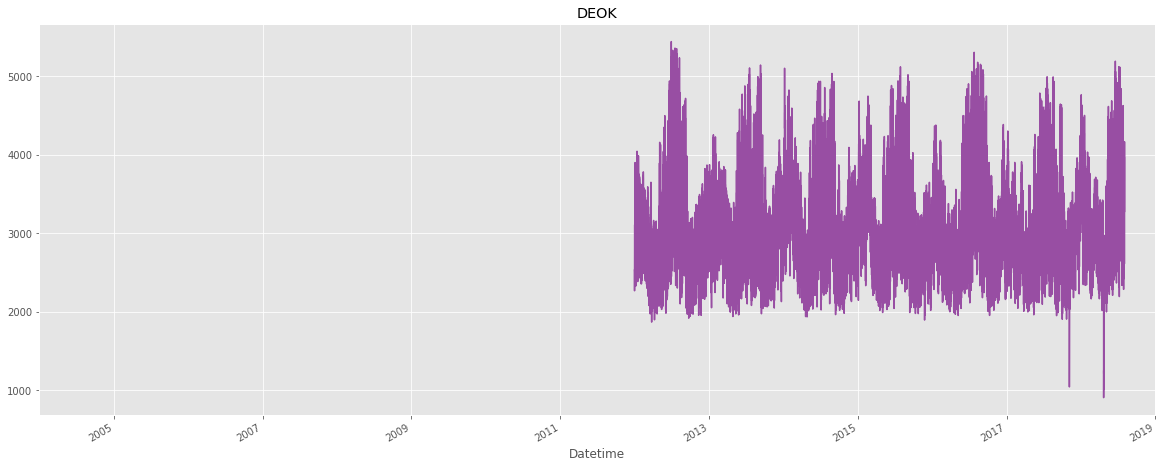

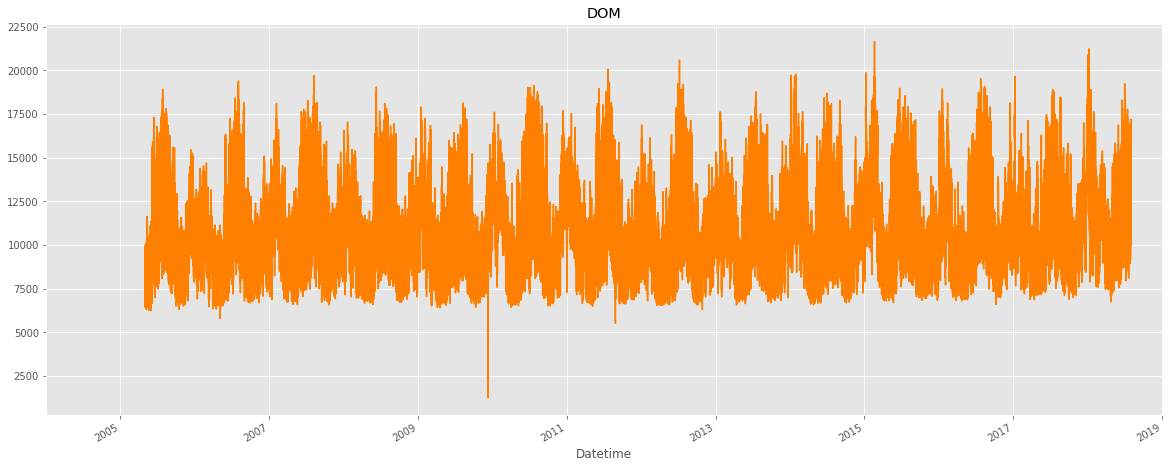

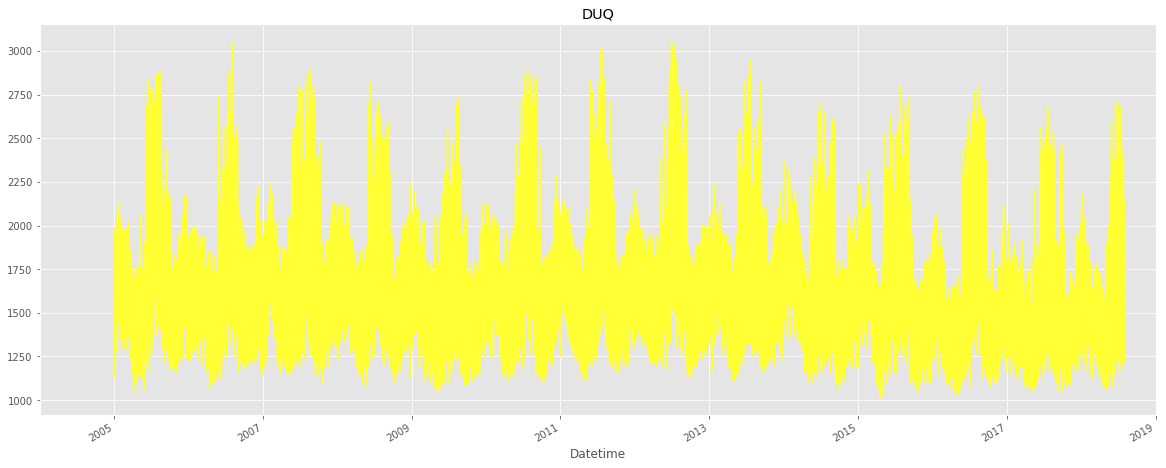

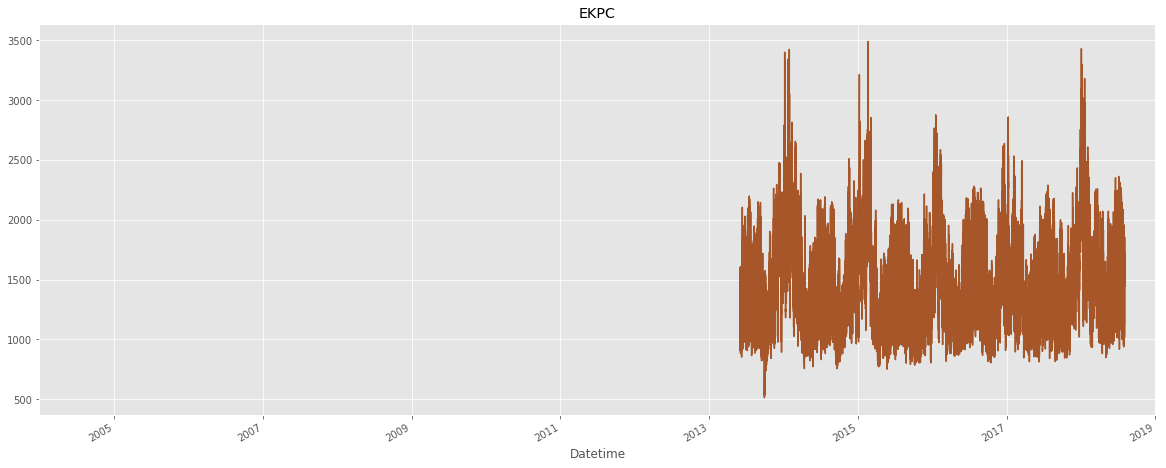

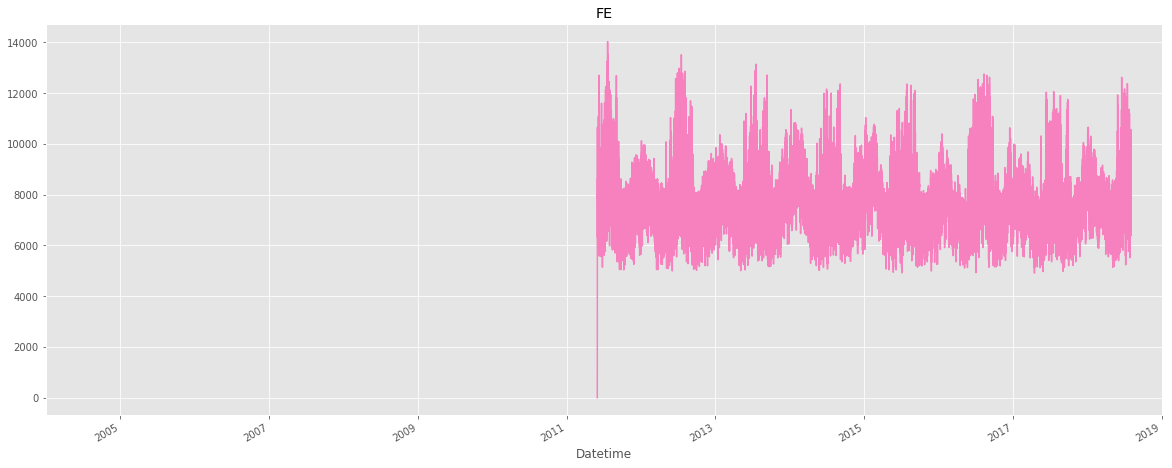

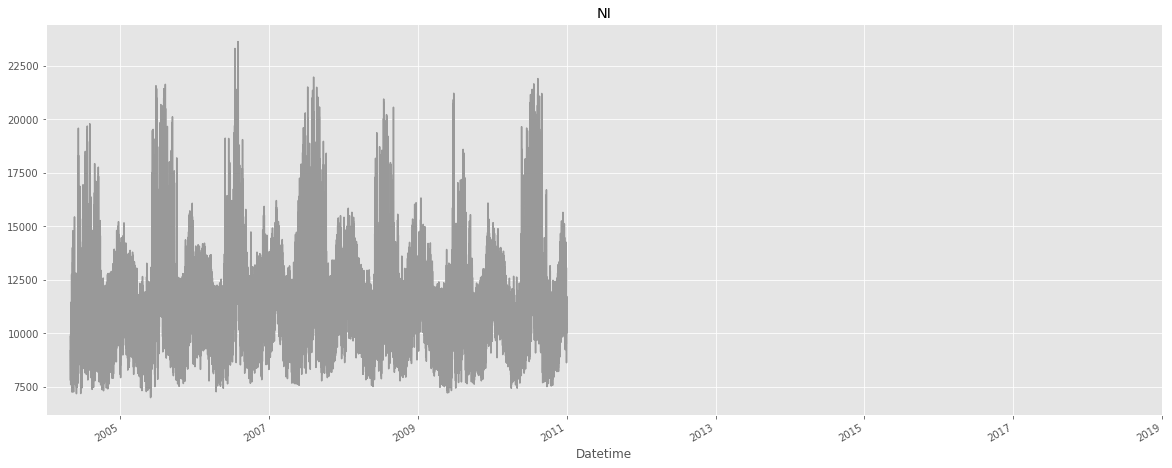

In [11]:
# Plot Regional Loads
region_list = ['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI']
count = 0
for region in region_list:
    plt.figure()
    est_hourly[region].plot(figsize=(20,8),
                            title=region,
                            color=plt.cm.Set1.colors[count],
                            xlim=('01-01-2004','01-01-2019'))
    count += 1

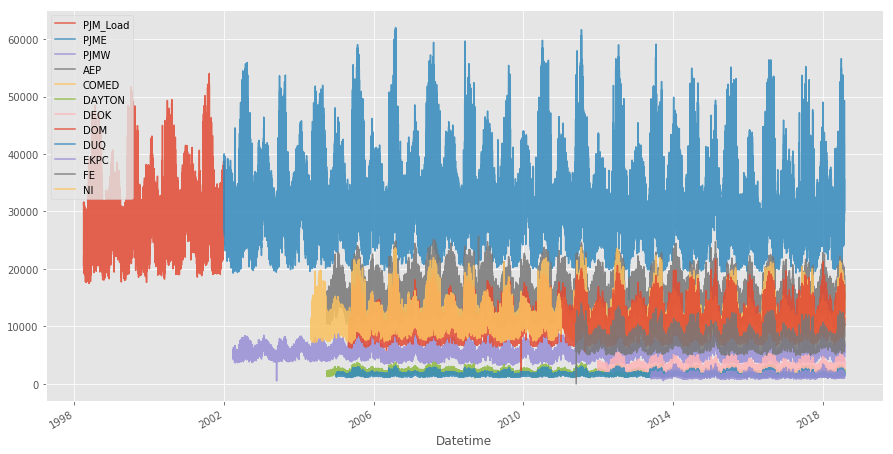

In [12]:
# Plot all regions on top of eachother
est_hourly[['PJM_Load','PJME','PJMW','AEP',
            'COMED','DAYTON','DEOK','DOM',
            'DUQ','EKPC','FE','NI']].plot(figsize=(15,8), alpha=0.85)

# Create Timeseries Features

In [13]:
est_hourly['dow'] = est_hourly.index.dayofweek
est_hourly['doy'] = est_hourly.index.dayofyear
est_hourly['year'] = est_hourly.index.year
est_hourly['month'] = est_hourly.index.month
est_hourly['quarter'] = est_hourly.index.quarter
est_hourly['hour'] = est_hourly.index.hour
est_hourly['weekday'] = est_hourly.index.weekday_name
est_hourly['woy'] = est_hourly.index.weekofyear
est_hourly['dom'] = est_hourly.index.day # Day of Month
est_hourly['date'] = est_hourly.index.date 
est_hourly.describe()

AEP         COMED         DAYTON          DEOK  \
count  121273.000000  66497.000000  121275.000000  57739.000000   
mean    15499.513717  11420.152112    2037.851140   3105.096486   
std      2591.399065   2304.139517     393.403153    599.859026   
min      9581.000000   7237.000000     982.000000    907.000000   
25%     13630.000000   9780.000000    1749.000000   2687.000000   
50%     15310.000000  11152.000000    2009.000000   3013.000000   
75%     17200.000000  12510.000000    2279.000000   3449.000000   
max     25695.000000  23753.000000    3746.000000   5445.000000   

                 DOM            DUQ          EKPC            FE            NI  \
count  116189.000000  119068.000000  45334.000000  62874.000000  58450.000000   
mean    10949.203625    1658.820296   1464.218423   7792.159064  11701.682943   
std      2413.946569     301.740640    378.868404   1331.268006   2371.498701   
min      1253.000000    1014.000000    514.000000      0.000000   7003.000000   
25%      9322.000000    1444.000000   1185.000000   6807.000000   9954.000000   
50%     10501.000000    1630.000000   1386.000000   7700.000000  11521.000000   
75%     12378.000000    1819.000000   1699.000000   8556.000000  12896.750000   
max     21651.000000    3054.000000   3490.000000  14032.000000  23631.000000   

                PJME           PJMW      PJM_Load            dow  \
count  145366.000000  143206.000000  32896.000000  178262.000000   
mean    32080.222831    5602.375089  29766.427408       2.999316   
std      6464.012166     979.142872   5849.769954       1.999543   
min     14544.000000     487.000000  17461.000000       0.000000   
25%     27573.000000    4907.000000  25473.000000       1.000000   
50%     31421.000000    5530.000000  29655.000000       3.000000   
75%     35650.000000    6252.000000  33073.250000       5.000000   
max     62009.000000    9594.000000  54030.000000       6.000000   

                 doy           year          month        quarter  \
count  178262.000000  178262.000000  178262.000000  178262.000000   
mean      182.617793    2007.918367       6.506765       2.504533   
std       104.729444       5.882480       3.425318       1.109587   
min         1.000000    1998.000000       1.000000       1.000000   
25%        93.000000    2003.000000       4.000000       2.000000   
50%       182.000000    2008.000000       6.000000       2.000000   
75%       273.000000    2013.000000       9.000000       3.000000   
max       366.000000    2018.000000      12.000000       4.000000   

                hour            woy            dom  
count  178262.000000  178262.000000  178262.000000  
mean       11.501705      26.534197      15.726739  
std         6.921759      14.968296       8.801827  
min         0.000000       1.000000       1.000000  
25%         6.000000      14.000000       8.000000  
50%        12.000000      26.000000      16.000000  
75%        18.000000      39.000000      23.000000  
max        23.000000      53.000000      31.000000

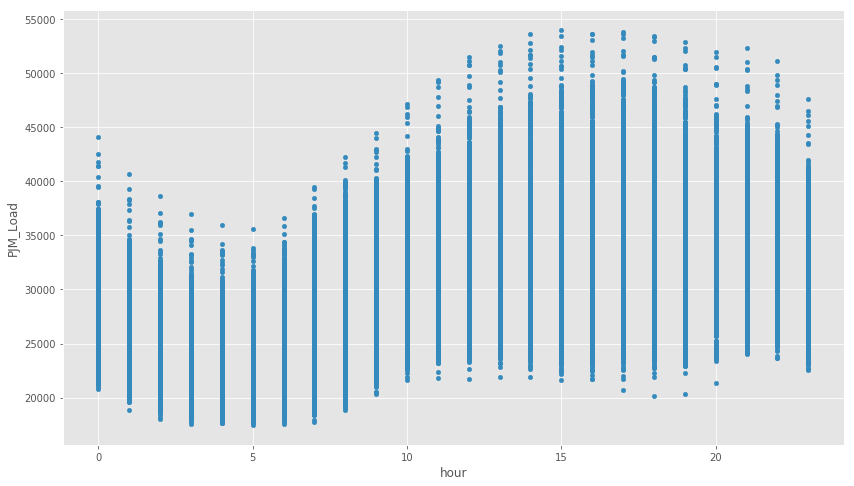

In [14]:
est_hourly[['PJM_Load','hour']].plot(x='hour', y='PJM_Load', kind='scatter', figsize=(14,8))

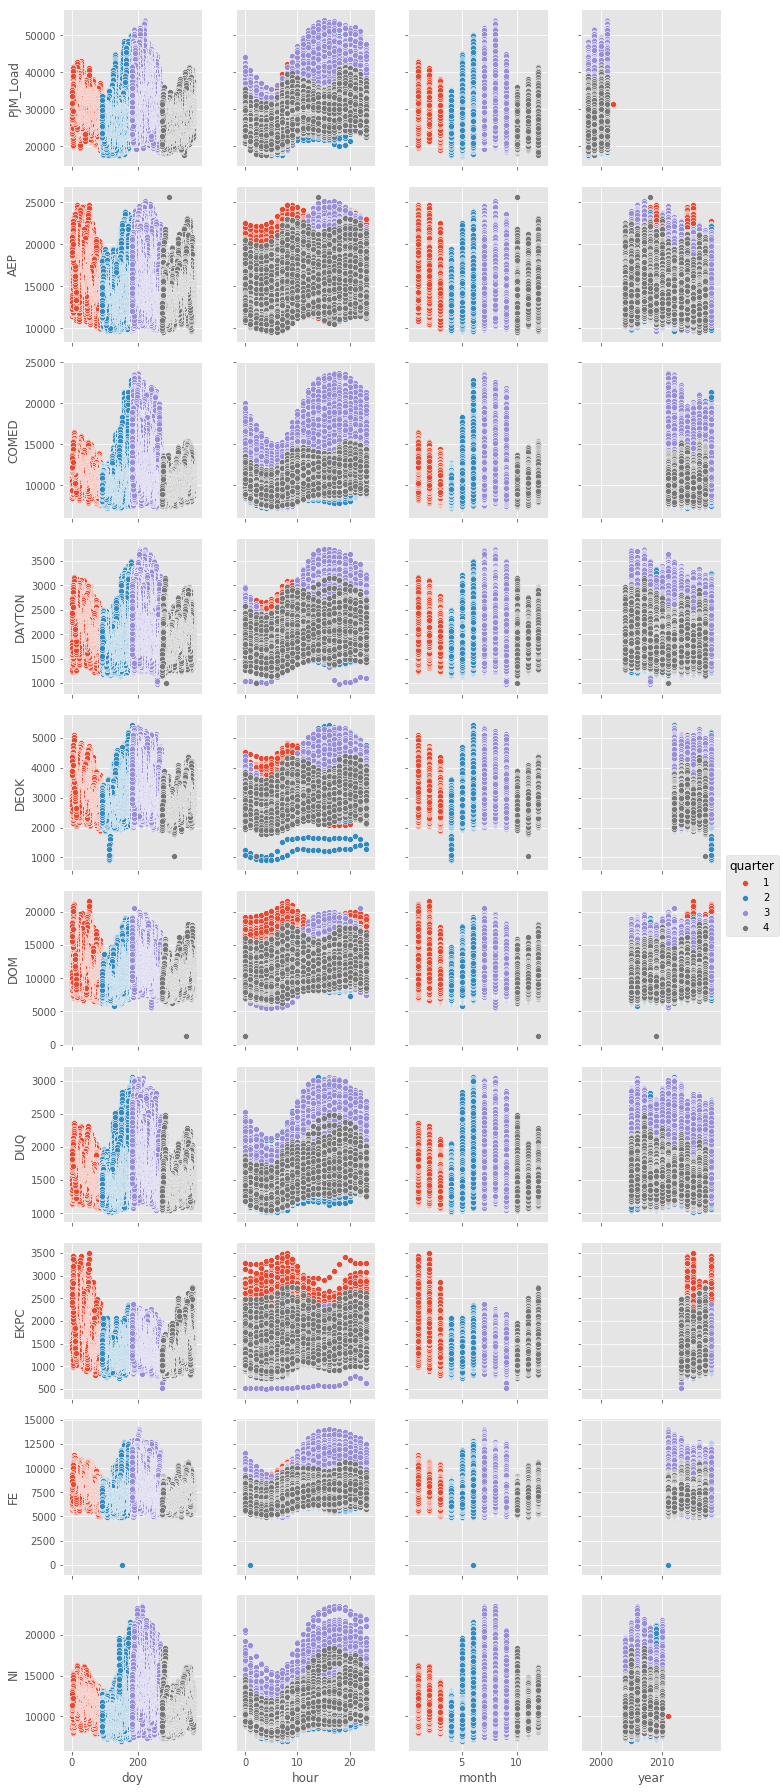

In [15]:
sns.pairplot(data=est_hourly,
             x_vars=['doy','hour','month','year'],
             y_vars=['PJM_Load', 'AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','NI'],
             hue='quarter')

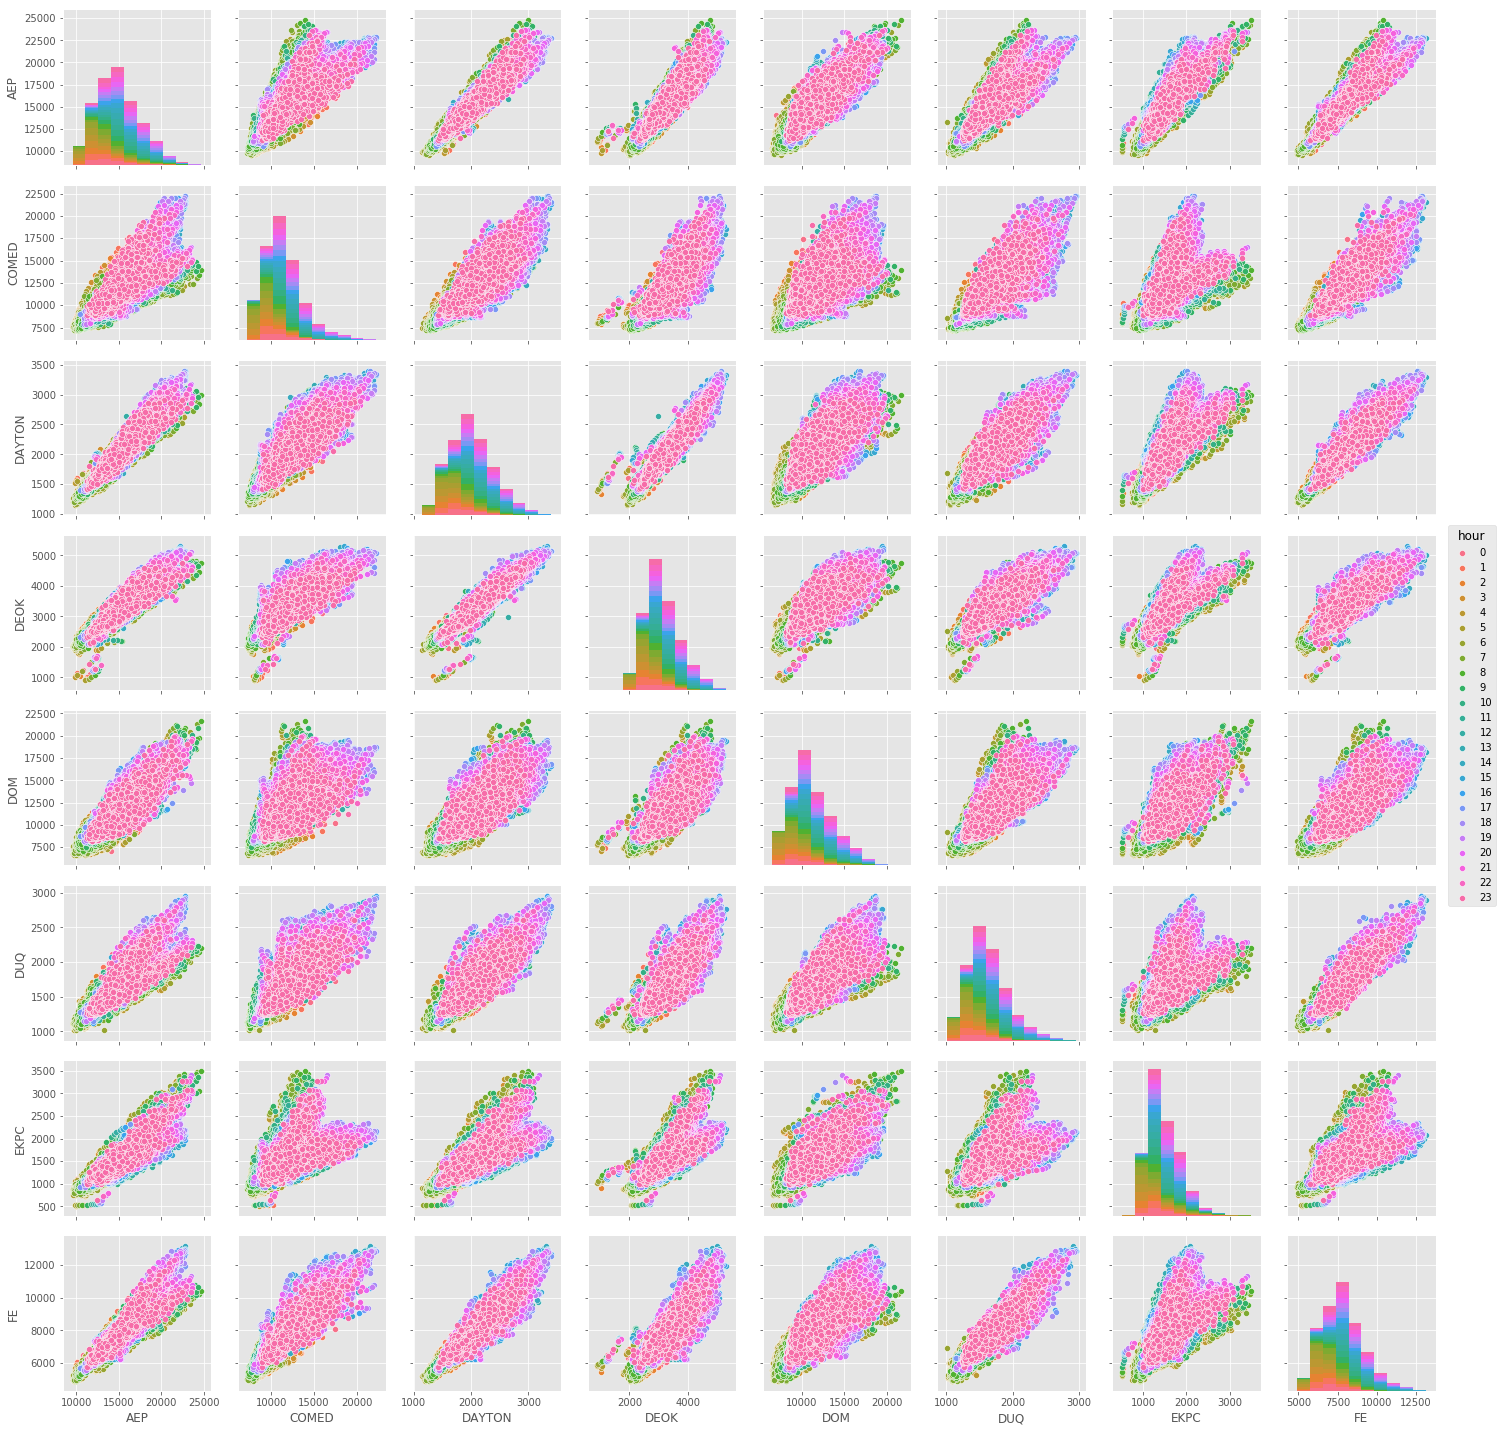

In [16]:
# See how region's load compares to eachother
sns.pairplot(data=est_hourly[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','hour']].dropna(),
             vars=['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE'],
             hue='hour')

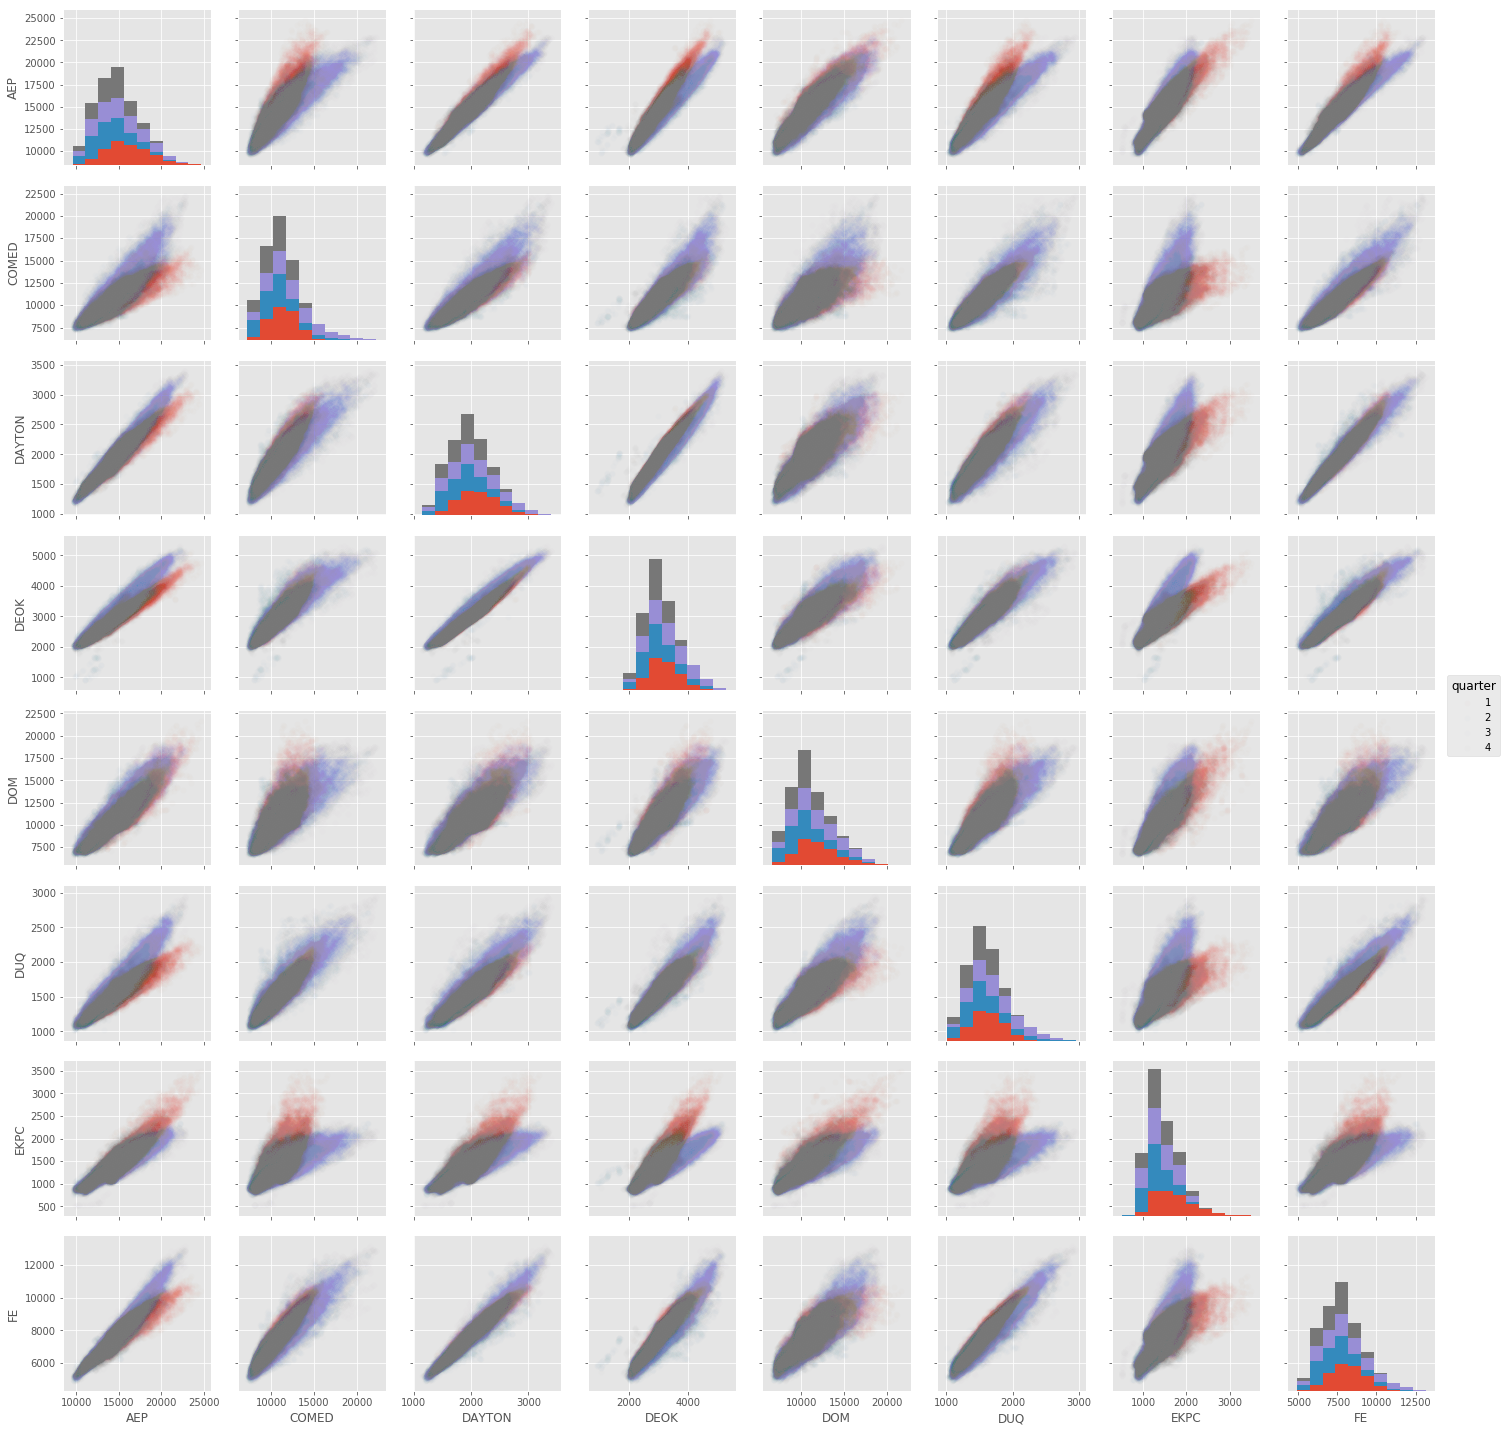

In [17]:
# See how region's load compares to eachother
# Add Alpha = 0.1 to make points transparent
sns.pairplot(data=est_hourly[['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE','quarter']].dropna(),
             vars=['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC','FE'],
             hue='quarter',
             plot_kws={'alpha': 0.01})

# Plot a Single Day

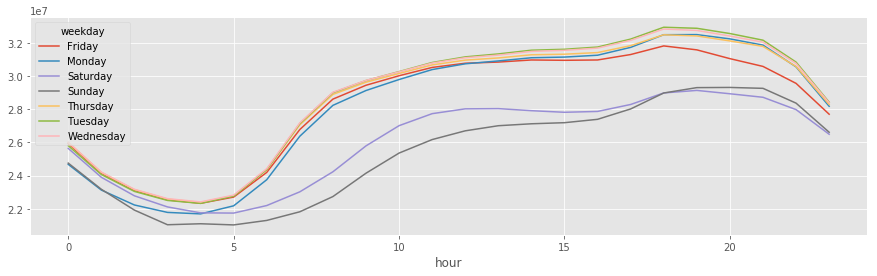

In [18]:
est_hourly.pivot_table(index=est_hourly['hour'], 
                     columns='weekday', 
                     values='PJME',
                     aggfunc='sum').plot(figsize=(15,4))

(0, 65000)

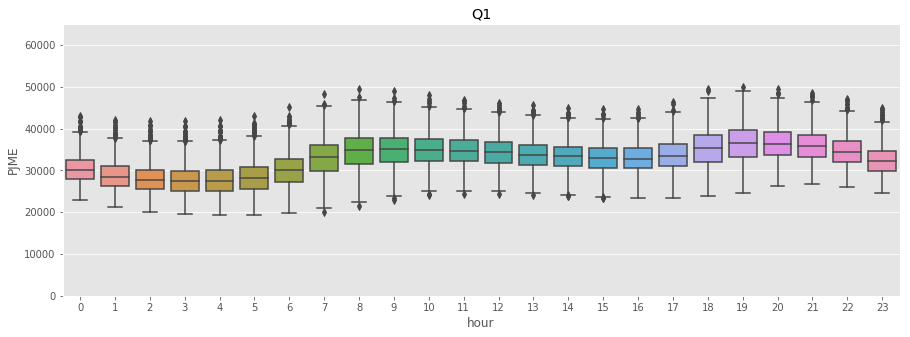

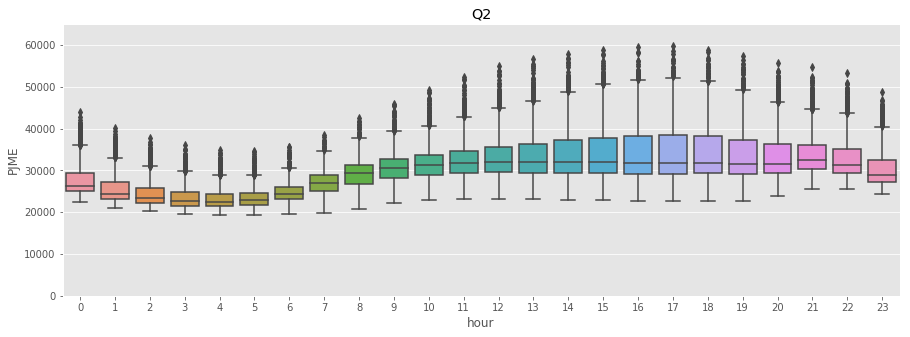

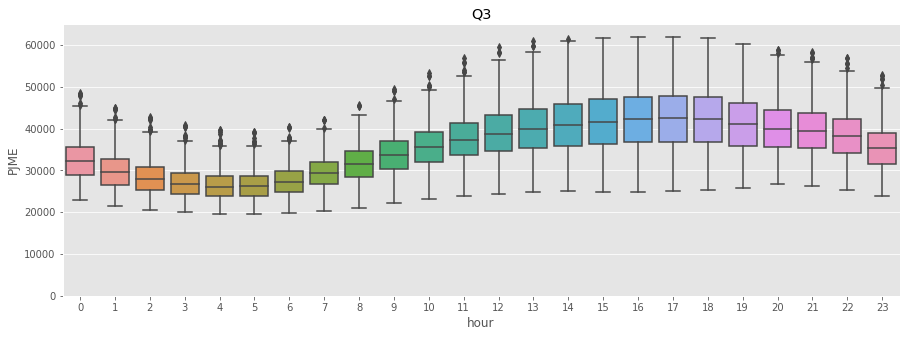

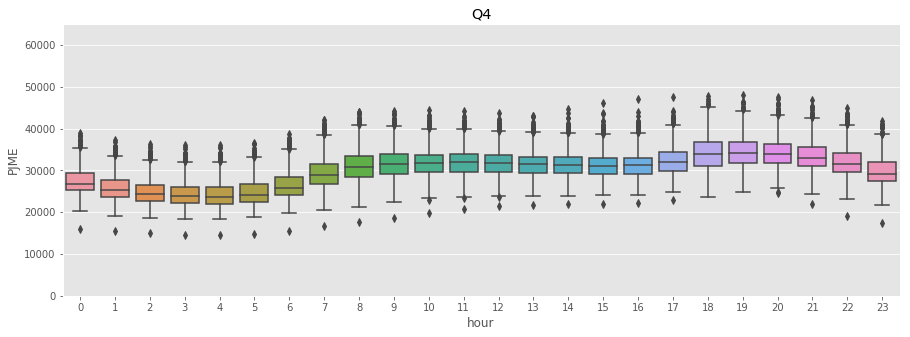

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(est_hourly.loc[est_hourly['quarter']==1].hour, est_hourly.loc[est_hourly['quarter']==1].PJME)
ax.set_title('Q1')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(est_hourly.loc[est_hourly['quarter']==2].hour, est_hourly.loc[est_hourly['quarter']==2].PJME)
ax.set_title('Q2')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(est_hourly.loc[est_hourly['quarter']==3].hour, est_hourly.loc[est_hourly['quarter']==3].PJME)
ax.set_title('Q3')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(est_hourly.loc[est_hourly['quarter']==4].hour, est_hourly.loc[est_hourly['quarter']==4].PJME)
ax.set_title('Q4')
ax.set_ylim(0,65000)

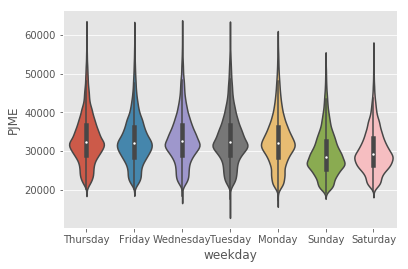

In [20]:
sns.violinplot(x="weekday", y="PJME", data=est_hourly)